In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from hexagon_utilities import *
from colors import *
from plot_functions import *

import matplotlib.pyplot as plt

## `hex.point()`

In this short notebook, we look at the `hex.point` method. 
It is a multi-purpose method whose main purpose is to return *one or more point coordinates.*

Once we get hold of the point(s), we can use that to draw lines, arcs, circles or more.

Here are the various ways in which the `point()` method can be use.

1. Get the center
2. get the 6 vertices (all or a partcular one)
2. get the 6 edge midpoints 
4. Trisect each edge (6 x 2 =12 point coordinates are returned)
5. return a random interior point
6. Get a random point *on_edge*
7. Get a random point on a Spoke
8. Get a point on a spoke, `dist` from center (bisect, trisect spoke)
7. On_edge, and `dist` away
8. From vertex, dist and theta away
9. From center, dist and theta away
12. Normal to edge, dist_on_edge_from_vertex, distance_away_from_edge


ALLOWABLE_POINT_NAMES = `['center', 'edge', 'vert', 'vertex', 'spoke']`



If you want just the Center of a given hexagon, make the dist (from center) = 0.
Note that in this case, only ONE point is returned, not six.

## Get and Plot the Center

`h.point('center', dist=None, theta=None)`

42


(-0.55, 0.55, -0.47631397208144133, 0.47631397208144133)

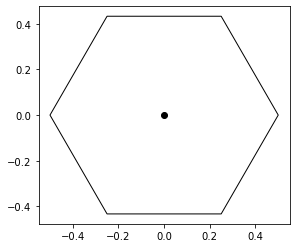

In [11]:
h = Hex(0, 0, size=0.5)
h.render(fc='none', color='k')
xy = h.point('center', dist=0)
plt.scatter(*xy, color='k')
plt.axis('scaled')

## h.point("center", dist, theta, index)

`h.point('center', dist=None, theta=None)`

- If `dist` is not specified, it will be randomly generated so that the point is INSIDE the hexagon
- If the `theta` is not specified, it will be randomly generated as an angle from the horizontal

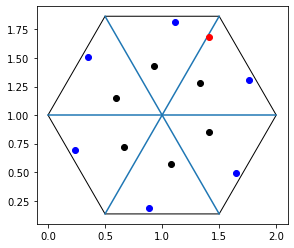

In [32]:
h = Hex(1,1,1)
h.render(fill=None)
h.render_spokes()
    
pt = h.point('center', dist=0.5, theta=20)
for p in pt:
    plt.plot(*p, 'ko')
    
#Choose a random dist and random theta
pt = h.point('center', dist=None, index=None)
for p in pt:
    plt.plot(*p, 'bo')
    
#If you want only one point, specify index between [0..5]    
pt = h.point('center', dist=None, index=0)
for p in pt:
    plt.plot(*p, 'ro')

plt.axis('scaled');

## h.point('vertices')

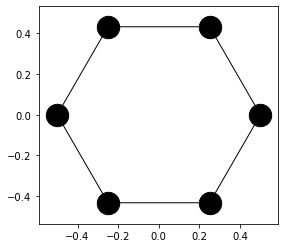

In [33]:
h = Hex(0, 0, size=0.5)
h.render(fc='none', color='k')
xys = h.point('vertices')
for p in xys:
    plt.scatter(*p, color='k', s=500)

plt.axis('scaled');

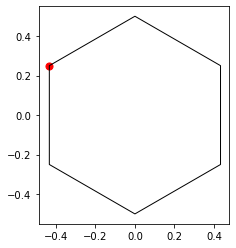

In [38]:
h = Hex(0, 0, size=0.5, flat=False)
h.render(fc='none', color='k')
xy = h.point('vertices', index=3) # index=3 says get me just the 3rd vertex
plt.scatter(*xy, color='r', s=50)

plt.axis('scaled');

Here are all the allowable pt_names:

## h.point('edge', action='trisect')

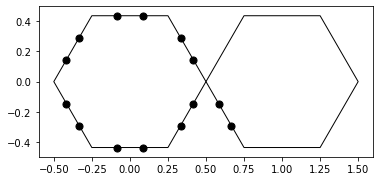

In [76]:
h = Hex(0, 0, size=0.5)
h.render(fc='none', color='k')
xys = h.point('edge', action='trisect', index=None) 
for p in xys:
    plt.scatter(*p, color='k', s=50)

h1 = Hex(1, 0, size=0.5)
h1.render(fc='none', color='k')
xys = h1.point('edge', action='trisect', index=3) 
for p in xys:
    plt.scatter(*p, color='k', s=50)
    
    
plt.axis('scaled');

## 'h.point('spoke', action='bisect')
## 'h.point('spoke', action='trisect')
## 'h.point('spoke', action='random')

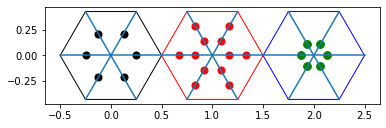

In [118]:
h = Hex(0, 0, size=0.5)
h1 = Hex(1, 0, size=0.5)
h2 = Hex(2, 0, size=0.5)
h.render(fc='none', color='k')
h1.render(fc='none', color='r')
h2.render(fc='none', color='b')
h.render_spokes()
h1.render_spokes()
h2.render_spokes()

xys = h.point('spoke', action='bisect', index=None) 
if xys:
    for p in xys:
        plt.scatter(*p, color='k', s=50)

xys = h1.point('spoke', action='trisect', index=3) 
if xys:
    for p in xys:
        plt.scatter(*p, color='r', s=50)

xys = h2.point('spoke', action='random') 
if xys:
    for p in xys:
        plt.scatter(*p, color='g', s=60)
        
        
    
plt.axis('scaled');

## 'h.point('spoke', dist)
## 'h.point('spoke', dist='random')

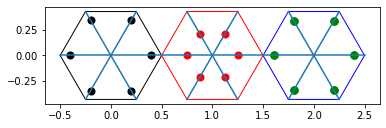

In [125]:
size=0.5
h = Hex(0, 0, size)
h1 = Hex(1, 0, size)
h2 = Hex(2, 0, size)
h.render(fc='none', color='k')
h1.render(fc='none', color='r')
h2.render(fc='none', color='b')
h.render_spokes()
h1.render_spokes()
h2.render_spokes()

xys = h.point('spoke', dist=size*0.8) 
if xys:
    for p in xys:
        plt.scatter(*p, color='k', s=50)

xys = h1.point('spoke', dist=size/2, index=3) 
if xys:
    for p in xys:
        plt.scatter(*p, color='r', s=50)

xys = h2.point('spoke', dist='random') 
if xys:
    for p in xys:
        plt.scatter(*p, color='g', s=60)
        
        
    
plt.axis('scaled');

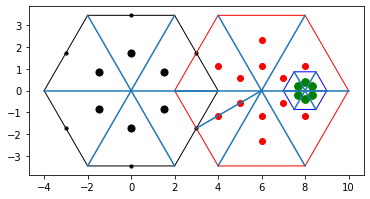

In [158]:
size= 1
h = Hex(0, 0,  4* size)
h1 = Hex(6*size, 0, 4*size)
h2 = Hex(8*size, 0, size)
h.render(fc='none', color='k')
h1.render(fc='none', color='r')
h2.render(fc='none', color='b')
h.render_spokes()
h1.render_spokes()
h1.render_apothems(index=3)

h2.render_spokes()

xys = h.point('apothem', dist=size*0.1, action='bisect') 
if xys:
    for p in xys:
        plt.scatter(*p, color='k', s=50)

xys = h.point('apothem', dist=h.h/2 ) 
if xys:
    for p in xys:
        plt.scatter(*p, color='k', s=10)
        
xys = h1.point('apothem', action='trisect', index=3) 
if xys:
    for p in xys:
        plt.scatter(*p, color='r')

xys = h2.point('apothem', dist='random') 
if xys:
    for p in xys:
        plt.scatter(*p, color='g', s=60)
        
        
    
plt.axis('scaled');

## The following really belongs in the Notebook about Lines.
Hasn't been written yet

(-1.1, 1.1, -1.1, 1.1)

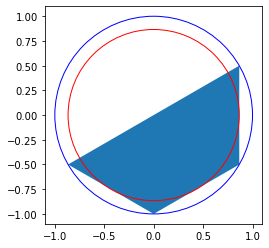

In [58]:
x,y = 0,0
h = Hex(x, y, size=1, flat=False)
#h.render(fc='none', color='k')
h.decorate(poly=HHEX4)
h.render_circle(fc='none', color='r')
h.render_circle(incircle=False, fc='none', color='b')
plt.axis('scaled')

(-1.1, 1.1, -1.1, 1.1)

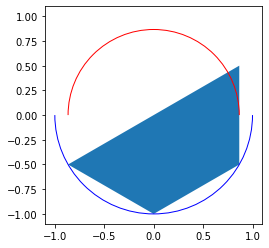

In [77]:
x,y = 0,0
h = Hex(x, y, size=1, flat=False)
#h.render(fc='none', color='k')
h.decorate(poly=HHEX4)
h.render_arc(fc='none', color='r', theta2=180)
h.render_arc(incircle=False, fc='none', color='b', theta1=180)
plt.axis('scaled')